In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv( "bikes_rent.csv")
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


In [3]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


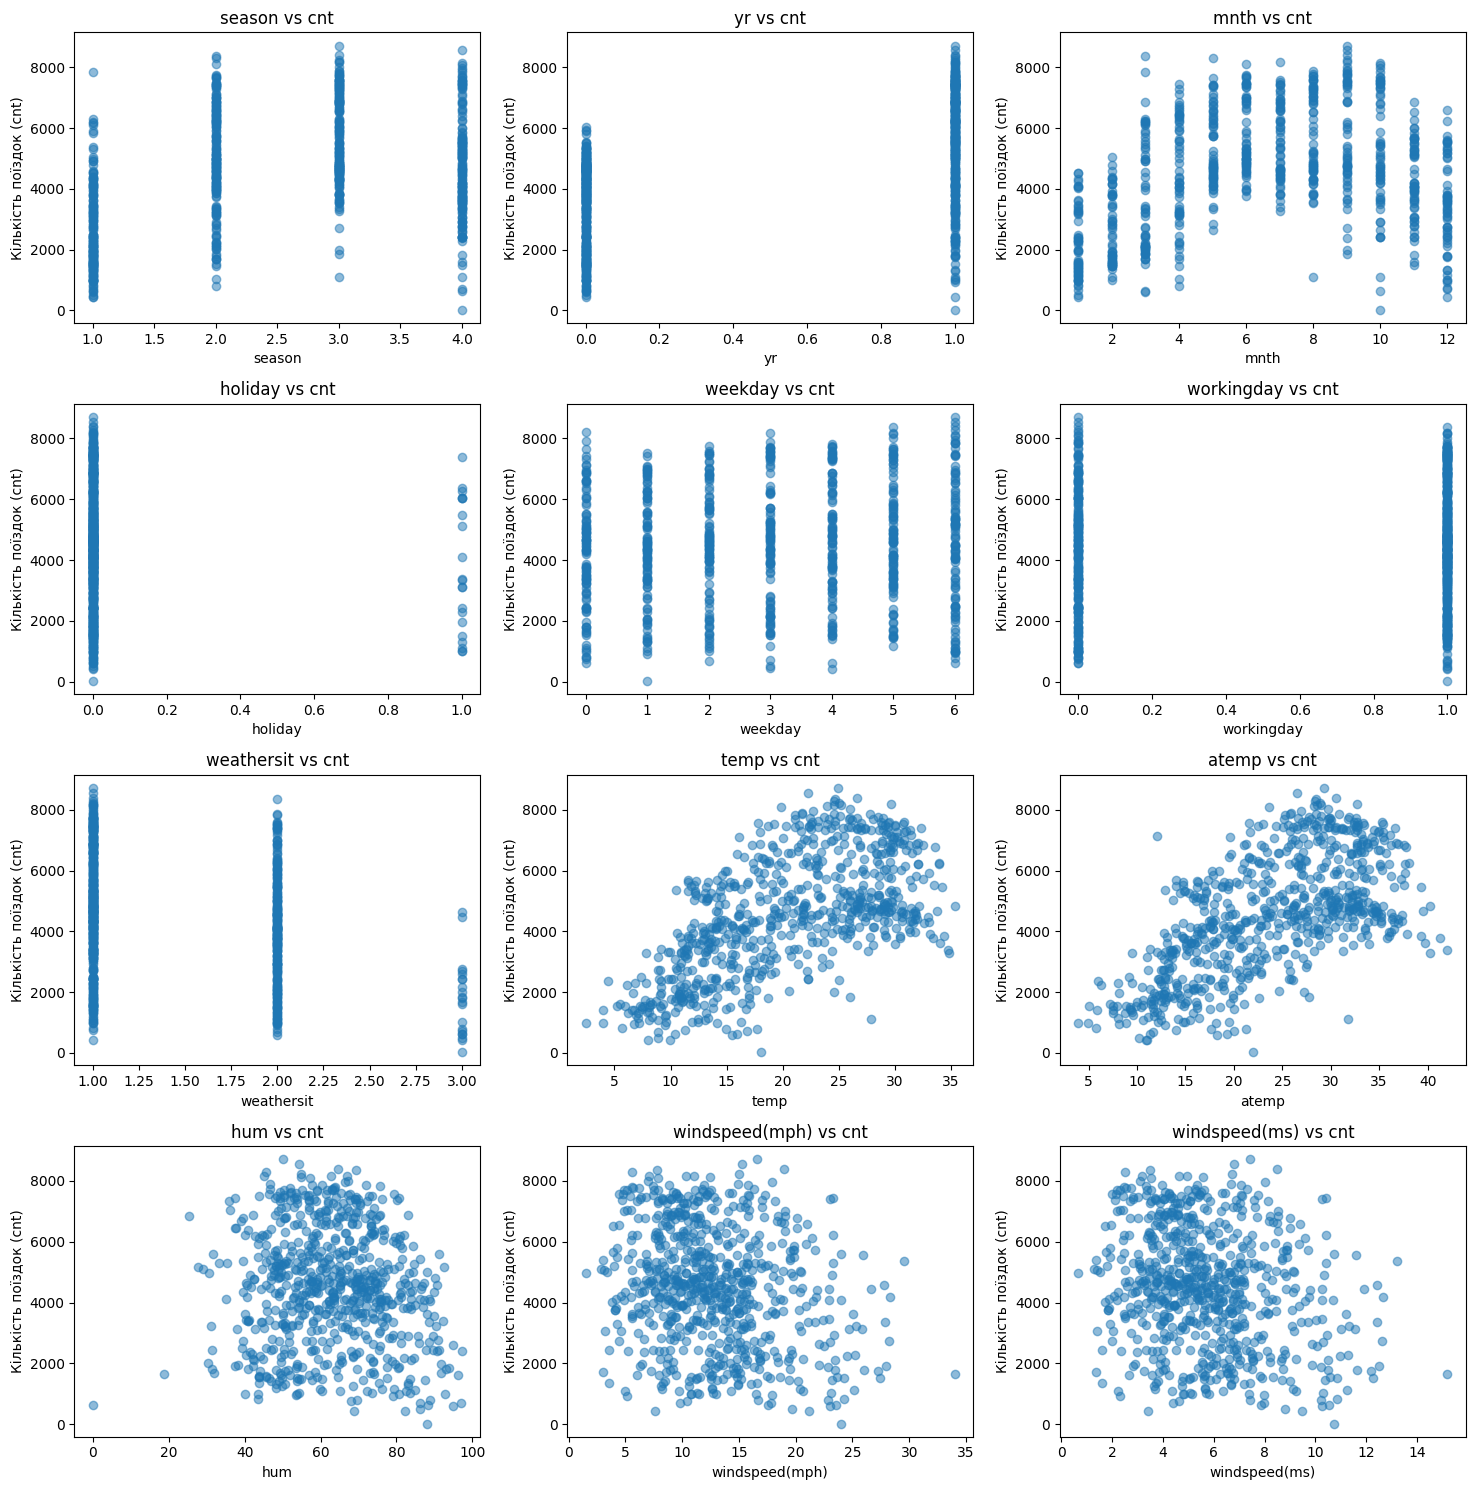

In [11]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.flatten()

# Список назв атрибутів (колонок), для яких будемо будувати графіки
attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Побудова графіків для кожного атрибута
for i, attr in enumerate(attributes):
    axs[i].scatter(df[attr], df['cnt'], alpha=0.5)
    axs[i].set_title(f'{attr} vs cnt')
    axs[i].set_xlabel(attr)
    axs[i].set_ylabel('Кількість поїздок (cnt)')

plt.tight_layout()
plt.show()

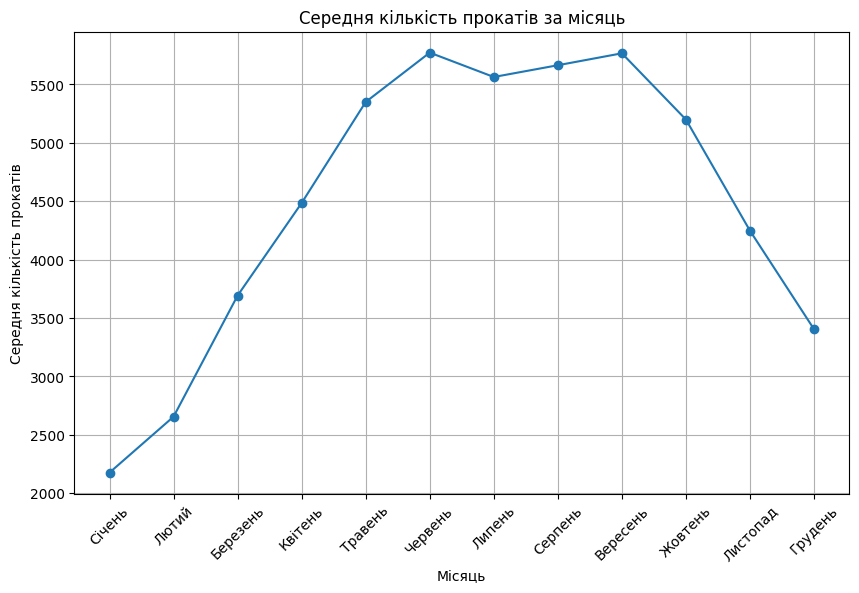

In [14]:
# Розрахунок середньої кількості прокатів для кожного місяця
monthly_rentals = df.groupby('mnth')['cnt'].mean()

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values, marker='o', linestyle='-')
plt.title('Середня кількість прокатів за місяць')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість прокатів')
plt.xticks(monthly_rentals.index, ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень'], rotation=45)
plt.grid(True)
plt.show()


Відповідь: 1. За графіком, що показує середню кількість прокатів за місяць, можна побачити, що залежність не є лінійною.
           2. Щодо ознак, від яких кількість прокатів скоріше за все залежить лінійно, це можуть бути температура (temp) та температура за відчуттями (atemp). 

In [44]:
correlations = df.corr()

cnt_correlations = df.corrwith(df.iloc[:, -1])

print(correlations)
print(cnt_correlations)


                  season        yr      mnth   holiday   weekday  workingday  \
season          1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr             -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth            0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday        -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday        -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday      0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit      0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp            0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp           0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum             0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed(mph) -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
windspeed(ms)  -0.229046 -0.011817 -0.20

In [45]:
# Вибираємо ознаки, для яких потрібно порахувати кореляції
selected_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']

# Отримуємо підмножину даних з обраними ознаками
selected_data = df[selected_features]

# Обчислюємо попарні кореляції за допомогою методу corr
pairwise_correlations = selected_data.corr()

print("Попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt:")
pairwise_correlations


Попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt:


,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [47]:
# Обчислення середніх значень для кожної ознаки
mean_values = df.mean()


print("Середні значення ознак:")
print(mean_values)


Середні значення ознак:
season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


In [48]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

# Перемішуємо дані
df_shuffled = shuffle(df, random_state=42)

# Виділяємо матрицю ознак X та цільову змінну y
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

# Ініціалізуємо та навчаємо модель лінійної регресії
model = LinearRegression()
model.fit(X, y)

# Виведемо коефіцієнти (ваги) ознак
print("Ваги ознак:")
print(model.coef_)


Ваги ознак:
[ 5.70863642e+02  1.02196042e+03 -1.41300633e+02 -8.67576047e+01
  1.37227258e+02  5.63898036e+01 -3.30227183e+02  3.67479903e+02
  5.85552180e+02 -1.45615523e+02  1.24543563e+13 -1.24543563e+13]


In [49]:
from sklearn.linear_model import LinearRegression

# Створення об'єкта лінійного регресора
model = LinearRegression()

# Навчання моделі на всіх даних
model.fit(X, y)

# Виведення пар (назва ознаки, вага)
print("Ваги моделі:")
for feature, weight in zip(df.columns[:-1], model.coef_):
    print(feature, weight)


Ваги моделі:
season 570.863641661725
yr 1021.9604245185086
mnth -141.3006331900142
holiday -86.75760471139698
weekday 137.2272583151452
workingday 56.38980357474366
weathersit -330.2271825899341
temp 367.4799030832653
atemp 585.5521797658965
hum -145.6155228231448
windspeed(mph) 12454356291009.727
windspeed(ms) -12454356291208.188
